In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [76]:
df=pd.read_csv(r'C:\Users\admin\Documents\Songs\Unsupervised_project\single_genre_artists.csv')
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [77]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

###Feature Selection

In [81]:
selected_df= df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
selected_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,161427
1,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,223440
2,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,208267
3,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,161933
4,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,167973
...,...,...,...,...,...,...,...,...,...,...
95832,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,174800
95833,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,265846
95834,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,82500
95835,0.562,0.0331,-25.551,0.1030,0.996,0.961000,0.1110,0.386,63.696,185250


In [82]:
selected_df=selected_df.sample(20000)

In [83]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df)
X = pd.DataFrame(scaled_data, columns=selected_df.columns)
X



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.641668,0.098198,-0.294279,-0.238570,1.595425,3.606227,-0.432835,0.212083,2.896498,0.092952
1,-0.545577,-1.699444,-1.555011,-0.477138,1.348193,-0.358882,-0.709944,-1.736659,-0.641471,0.012230
2,-0.398239,-0.286708,0.060092,-0.496413,1.073825,-0.358882,0.121383,0.332873,-1.418326,0.245011
3,0.690784,0.910310,1.081713,-0.372401,-1.334885,-0.358870,-0.642684,0.828111,-0.909277,-0.198504
4,0.959836,0.440808,0.554662,-0.374219,-1.377368,3.504666,-0.201463,-0.126129,0.243153,7.521749
...,...,...,...,...,...,...,...,...,...,...
19995,1.299355,-0.117519,0.446737,-0.484775,0.145195,-0.358583,-0.427454,-0.983736,0.169107,1.421175
19996,-0.404645,-0.828116,-0.448098,-0.502231,-0.014602,-0.358816,-0.712634,-0.971657,-1.433142,0.992921
19997,0.037370,1.290987,0.967920,-0.470592,-1.090064,-0.358882,0.003006,1.037480,0.604473,0.720511
19998,-0.058720,-0.477047,0.368779,-0.444771,0.057759,2.260544,-0.007756,0.586531,1.500778,-0.916545


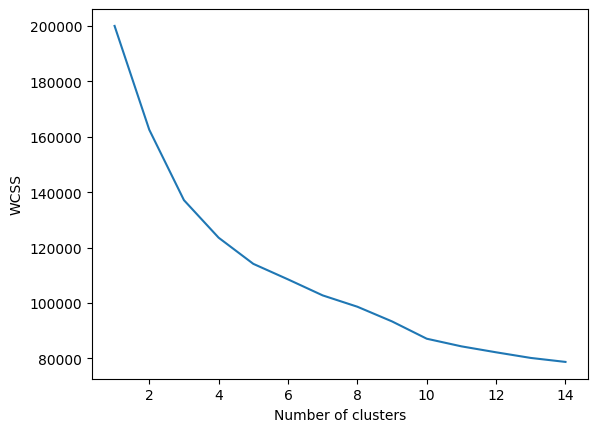

In [84]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0,n_init='auto',max_iter=3000)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
kmeans=KMeans(n_clusters=8,random_state=0,n_init='auto')
kmeans.fit(X)
kmeans.inertia_
selected_df['Target']=kmeans.predict(X)
selected_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Target
49896,0.486,0.564,-11.574,0.1030,0.98600,0.937000,0.1450,0.627,205.426,218640,7
48268,0.501,0.139,-17.590,0.0374,0.90400,0.000000,0.0935,0.143,98.206,209600,1
68452,0.524,0.473,-9.883,0.0321,0.81300,0.000000,0.2480,0.657,74.663,235669,1
84982,0.694,0.756,-5.008,0.0662,0.01410,0.000003,0.1060,0.780,90.090,186000,5
78796,0.736,0.645,-7.523,0.0657,0.00001,0.913000,0.1880,0.543,125.015,1050587,7
...,...,...,...,...,...,...,...,...,...,...,...
77060,0.789,0.513,-8.038,0.0353,0.50500,0.000071,0.1460,0.330,122.771,367387,4
63374,0.523,0.345,-12.308,0.0305,0.45200,0.000016,0.0930,0.333,74.214,319427,1
93669,0.592,0.846,-5.551,0.0392,0.09530,0.000000,0.2260,0.832,135.965,288920,5
95129,0.577,0.428,-8.410,0.0463,0.47600,0.619000,0.2240,0.720,163.128,105587,7


In [86]:
score=silhouette_score(X,kmeans.labels_)
score

0.1791731459731303

In [91]:
# Features to use for similarity
features = ['danceability','energy','loudness','speechiness',
            'acousticness','instrumentalness','liveness','valence',
            'tempo','duration_ms']

# Create a DataFrame with numeric features + song names
df_features = selected_df[features].copy()
# Get song names from original df using the index
df_features['name_song'] = df.loc[selected_df.index, 'name_song'].values


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

X_features = df_features[features]  # only numeric columns
cos_sim = cosine_similarity(X_features)


In [94]:
def recommendation(song_index, top_n=3):
    scores = list(enumerate(cos_sim[song_index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = [s for s in scores if s[0] != song_index]
    scores = scores[:top_n]
    
    recommendations = [(df_features.iloc[i]['name_song'], round(score, 2)) for i, score in scores]
    return recommendations

# Example: recommend top 3 songs similar to song at index 4
recommendation(4, top_n=3)


[('Poutpourri de Antaño (El Suicida - La Religion del Golgota - Cosas del Amor - Prenda del Alma - Virgen Bella)',
  np.float64(1.0)),
 ("Suite (From Dr. Ehrlich's Magic Bullet) (1940)", np.float64(1.0)),
 ('Piyay - Live', np.float64(1.0))]